## Load the datas

In [7]:
import pandas as pd
import os

folder = "../data/stocks/"

# automatically detect all CSV files
files = [f for f in os.listdir(folder) if f.endswith(".csv")]

dataframes = {}

for file in files:
    ticker = file.replace(".csv", "")  # extract ticker (AAPL, AMZN, etc.)

    df = pd.read_csv(folder + file)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    dataframes[ticker] = df

# Example: Access AAPL dataframe
print(dataframes["AAPL"].head())

# clean each dateframe
for ticker, df in dataframes.items():
    df.columns = df.columns.str.capitalize()




        Date     Close      High       Low      Open      Volume
0 2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
1 2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2 2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
3 2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
4 2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800


## Technical Indicators (TA-Lib)

In [10]:
import talib as ta

for ticker, df in dataframes.items():
    df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
    df['SMA_50'] = ta.SMA(df['Close'], timeperiod=50)

    df['RSI_14'] = ta.RSI(df['Close'], timeperiod=14)

    df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(
        df['Close'],
        fastperiod=12,
        slowperiod=26,
        signalperiod=9
    )


## PyNance Metrics

In [18]:
import pynance as pn

for ticker, df in dataframes.items():
    price_series = df['Close'].dropna()

    # annualized volatility
    vol = pn.volatility.annualized(price_series)

    # daily returns
    daily_returns = pn.returns.simple(price_series)

    df['Daily_Return'] = daily_returns

    print(f"{ticker} Annualized Volatility:", vol)


ModuleNotFoundError: No module named 'pynance'

## Visualizations

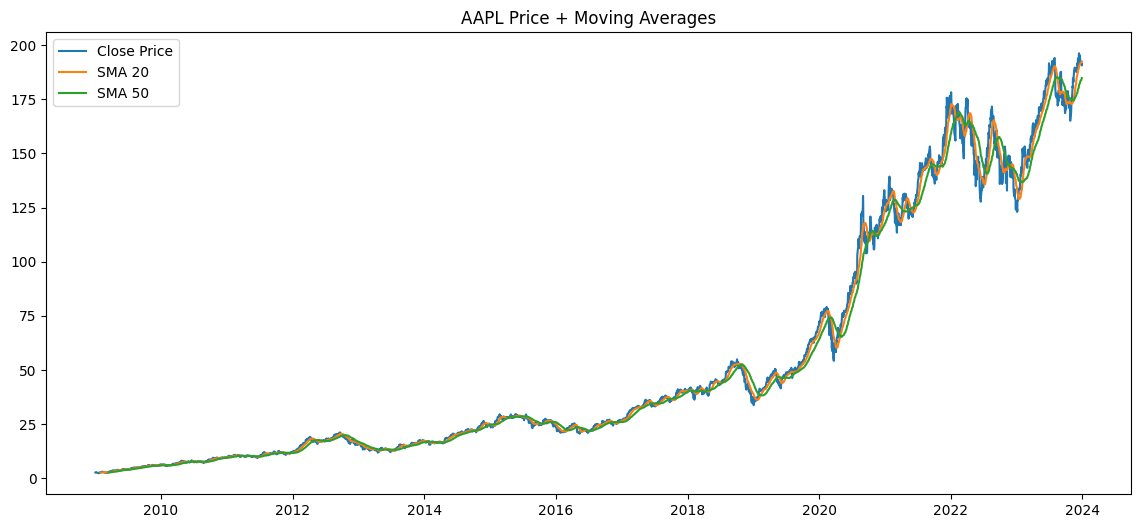

In [11]:
import matplotlib.pyplot as plt

ticker = "AAPL"
df = dataframes[ticker]

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50')
plt.title(f"{ticker} Price + Moving Averages")
plt.legend()
plt.show()
